In [3]:
import pandas as pd
import numpy as np

In [19]:
#Import
df_engagement = pd.read_csv('takehome_user_engagement.csv')

In [21]:
#take care of time_stamp column 
df_engagement['time_stamp'] = pd.to_datetime(df_engagement['time_stamp'])
df_engagement.index=df_engagement.time_stamp
df_engagement.drop(labels='time_stamp',axis=1,inplace=True)

In [23]:
df_engagement.head(2)

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1


In [34]:
#obtain no of times different users in a week
df_engagement_agg = df_engagement.groupby([pd.Grouper(freq='W'),'user_id']).sum()

In [35]:
df_engagement_agg.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 68807 entries, (Timestamp('2012-06-03 00:00:00', freq='W-SUN'), 563) to (Timestamp('2014-06-08 00:00:00', freq='W-SUN'), 11924)
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   visited  68807 non-null  int64
dtypes: int64(1)
memory usage: 809.0 KB


In [79]:
#get the users with more than 3 times  and creat the adopted_users data frame
df_adopt = df_engagement_agg[df_engagement_agg.visited>=3].unstack(level=1).melt()
adopted_users = pd.DataFrame(df_adopt.user_id.unique(),index=range(df_adopt.user_id.unique().shape[0]),columns=['user_id'])

In [91]:
df_users = pd.read_csv('takehome_users.csv')
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [113]:
#merge the two data frame, based on the adopted user id and the object id for df_users
df_join = df_users.merge(adopted_users,how='inner',left_on='object_id',right_on='user_id')

In [114]:
df_join.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id
0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2
1,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,10
2,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN,20
3,33,2014-03-11 06:29:09,Araujo Jos�,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0,33
4,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN,42


In [115]:
df_join = df_join.drop(columns = ['object_id', 'creation_time', 'name', 'email', 'user_id'],axis=1)

In [116]:
df_join.head()

,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,ORG_INVITE,1.396238e+09,0,0,1,316.0
1,ORG_INVITE,1.401833e+09,1,1,318,4143.0
2,SIGNUP,1.401364e+09,0,0,58,NaN
3,GUEST_INVITE,1.401518e+09,0,0,401,79.0
4,SIGNUP,1.401045e+09,1,0,235,NaN


In [135]:
df_join.isnull().sum()

creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

In [132]:
mode = df_join['invited_by_user_id'].mode()[0]

In [134]:
df_join['invited_by_user_id']=df_join['invited_by_user_id'].fillna(mode)

In [136]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1444
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             1445 non-null   object 
 1   last_session_creation_time  1445 non-null   float64
 2   opted_in_to_mailing_list    1445 non-null   int64  
 3   enabled_for_marketing_drip  1445 non-null   int64  
 4   org_id                      1445 non-null   int64  
 5   invited_by_user_id          1445 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 79.0+ KB


In [137]:
#one hot encoding of the categorical data for model building
df_dummy = pd.get_dummies(df_join['creation_source'])
df_features = pd.concat([df_join,df_dummy],axis=1)
df_features.drop('creation_source',axis=1,inplace=True)

In [138]:
#change all the into the float64
for col in df_features.columns:
    df_features[col] = df_features[col].astype('float64')
df_features.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1.396238e+09,0.0,0.0,1.0,316.0,0.0,1.0,0.0,0.0,0.0
1,1.401833e+09,1.0,1.0,318.0,4143.0,0.0,1.0,0.0,0.0,0.0
2,1.401364e+09,0.0,0.0,58.0,2354.0,0.0,0.0,0.0,1.0,0.0
3,1.401518e+09,0.0,0.0,401.0,79.0,1.0,0.0,0.0,0.0,0.0
4,1.401045e+09,1.0,0.0,235.0,2354.0,0.0,0.0,0.0,1.0,0.0


In [139]:
#Use the PCA to find the features that explained the highest variance
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#scale data
scaler = StandardScaler()
features = scaler.fit_transform(df_features)

#fit PCA
pca = PCA()
components = pca.fit_transform(features)

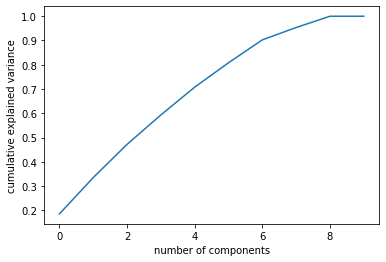

In [145]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig("PCA cumulative explained variance.png")

In [142]:
np.sum(pca.explained_variance_ratio_[0:7])

0.9026596524124301

In [144]:
df_comp = pd.DataFrame(pca.components_,columns=df_features.columns,index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
best_features = np.absolute(df_comp[np.absolute(df_comp) > 0.1])
best_features.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
PC1,NaN,NaN,NaN,NaN,0.612020,0.195100,0.525233,0.230929,0.401178,0.294687
PC2,NaN,0.695732,0.699426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC3,0.122405,NaN,NaN,NaN,0.106413,0.796603,0.562149,NaN,0.102757,NaN
PC4,NaN,NaN,NaN,0.257645,NaN,NaN,NaN,0.109242,0.640877,0.704748
PC5,0.231274,NaN,NaN,0.221662,NaN,NaN,NaN,0.824492,0.297864,0.348203


The first 7 components,explained variance is  more than 90%, these components are highly predictive for the adopted users. From the table above we get the most important features which forms the PCA components. The first components is explained by the features like invited_by_user_id,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH. Though PCA used for dimensionality reduciton , here we have the idea these components are the true factores to predict the adoptive users.